### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
import cvxopt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/SVM tutorial

Mounted at /content/drive
/content/drive/MyDrive/SVM tutorial


### Load Data

In [2]:
df = pd.read_csv("./data/heart_disease_dataset.csv")
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


#### Preprocessing Data

#### Outlier Detection & Removal:
We will filter ouliers using Z-test.

Z-test formula:
\begin{equation*}
    Z = \bigg|\frac {x - mu} {std}\bigg|
\end{equation*}

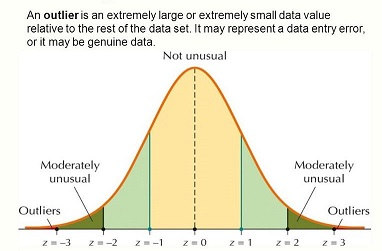

In [ ]:
threshold = 3
target=df['target'].tolist()
age=df['age'].tolist()
resting=df['resting bp s'].tolist()
cholesterol=df['cholesterol'].tolist()
max_heart_rate=df['max heart rate'].tolist()
def find_indices(list_to_check, item_to_find):
    array = np.array(list_to_check)
    indices = np.where(array == item_to_find)[0]
    return list(indices)
def checkOutlier(target,information,threshold):
    mean1 = np.mean(information)
    std1 = np.std(information)
    outlier = []
    for i in information:
        z = (i-mean1)/std1
        if np.abs(z) > threshold:
            outlier.append(find_indices(information, i))
    
    return outlier
outlier=[]
outlier.append(checkOutlier(target,age,threshold))
outlier.append(checkOutlier(target,cholesterol,threshold))
outlier.append(checkOutlier(target,max_heart_rate,threshold))
outlier.append(checkOutlier(target,resting,threshold))
import itertools
outlier=list(itertools.chain.from_iterable(outlier))
outlier=list(itertools.chain.from_iterable(outlier))
outlier = set(outlier) 
outlier = (list(outlier))
for i in range(len(outlier)):
    df = df.drop(outlier[i])
        
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


### Normalized Data

In [ ]:
df['age']=df['age']/(max(df['age'].tolist()))
df['chest pain type']=df['chest pain type']/(max(df['chest pain type'].tolist()))
df['resting bp s']=df['resting bp s']/(max(df['resting bp s'].tolist()))
df['cholesterol']=df['cholesterol']/(max(df['cholesterol'].tolist()))
df['fasting blood sugar']=df['fasting blood sugar']/(max(df['fasting blood sugar'].tolist()))
df['resting ecg']=df['resting ecg']/(max(df['resting ecg'].tolist()))
df['max heart rate']=df['max heart rate']/(max(df['max heart rate'].tolist()))
df['exercise angina']=df['exercise angina']/(max(df['exercise angina'].tolist()))
df['ST slope']=df['ST slope']/(max(df['ST slope'].tolist()))
df['oldpeak']=df['oldpeak']/(max(df['oldpeak'].tolist()))
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,0.519481,1,0.50,0.756757,0.588595,0.0,0.0,0.851485,0.0,0.000000,0.333333,0
1,0.636364,0,0.75,0.864865,0.366599,0.0,0.0,0.772277,0.0,0.161290,0.666667,1
2,0.480519,1,0.50,0.702703,0.576375,0.0,0.5,0.485149,0.0,0.000000,0.333333,0
3,0.623377,0,1.00,0.745946,0.435845,0.0,0.0,0.534653,1.0,0.241935,0.666667,1
4,0.701299,1,0.75,0.810811,0.397149,0.0,0.0,0.603960,0.0,0.000000,0.333333,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,0.584416,1,0.25,0.594595,0.537678,0.0,0.0,0.653465,0.0,0.193548,0.666667,1
1186,0.883117,1,1.00,0.778378,0.393075,1.0,0.0,0.698020,0.0,0.548387,0.666667,1
1187,0.740260,1,1.00,0.702703,0.266802,0.0,0.0,0.569307,1.0,0.193548,0.666667,1
1188,0.740260,0,0.50,0.702703,0.480652,0.0,1.0,0.861386,0.0,0.000000,0.666667,1


### Splilting Data

In [ ]:
# The original dataset labels is 0 and 1 and in the following code we change it to -1 and 1. 
df.target.replace(0 , -1 , inplace = True) 

# Turn pandas dataframe to numpy array type
df = df.to_numpy()

# Splitting data into train and test part. 70% for train and 30% for test
train = df[:int(len(df) * 0.7)]
test = df[int(len(df) * 0.7):]

# Getting features 
X_train = train[: , :-1]
y_train = train[: , -1]

# Getting labels
X_test = test[: , :-1]
y_test = test[: , -1]

### Reporting result score

In [ ]:
def classification_report(y_true, y_pred):
    Accuracy = None 
    Precision = None
    Recall = None
    F1score = None
    TP=[]
    FN=[]
    FP=[]
    acc=[]
    for i in range(len(y_true)):
      #print(y_pred[i],"  ",y_true[i])
      if(y_pred[i]==y_true[i]):
        acc.append(y_pred[i])
      if(y_pred[i]==y_true[i] and y_pred[i]==1):
        TP.append(y_pred[i])
      if(y_pred[i]!=y_true[i] and y_pred[i]==1):
        FN.append(y_pred[i])
      if(y_pred[i]!=y_true[i] and y_pred[i]==-1):
        FP.append(y_pred[i])
    Accuracy=len(acc)/len(y_true)
    Precision=len(TP)/(len(TP)+len(FP))
    Recall=len(TP)/(len(TP)+len(FN))
    F1score=2*Precision*Recall/(Precision+Recall)
    return Accuracy, Precision, Recall, F1score

#### SVM:

\begin{equation*}
    min_{\alpha}\quad\frac{1}{2}\alpha^T\,Q\,\alpha-1^T\,\alpha\\
    s.t.\qquad y^T\,\alpha=0,\,\alpha\ge0
\end{equation*}

where:
\begin{equation*}
    Q_{i,j}=y_i\,y_j\,\langle x_i\,,\,x_j\rangle
\end{equation*}

and:
\begin{equation*}
    \text{if}\;(\alpha_n>0)\;\text{then}\;x_n\;\text{is a  support vector}
\end{equation*}



[Quadratic Programming](https://cvxopt.org/userguide/coneprog.html#quadratic-programming)

In [ ]:
# Hide cvxopt output
cvxopt.solvers.options["show_progress"] = False


def linear_kernel(x1, x2):
    return np.dot(x1, x2)

def polynomial_kernel(x, y, p=3):
    return (1 + np.dot(x, y)) ** p

def rbf_kernel(x, y, sigma=0.15):
    return np.exp(-np.linalg.norm(x-y)**2 / (2 * (sigma ** 2)))



class MySVM(object):
    def __init__(self, kernel=linear_kernel, C=None):
        self.kernel = kernel
        self.C = C
        if self.C is not None: self.C = float(self.C)

    def fit(self, X, y):

        n_samples, n_features = X.shape

        #####################################################################################
        ##  Compute Gram matrix "K" for the given kernel.                             ##
        #####################################################################################        
        K = None
        # Gram matrix
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i,j] = self.kernel(X[i], X[j])



        #####################################################################################
        ## Setup SVM objective function in QP form (Notation from attached link).    ##
        #####################################################################################
        P = cvxopt.matrix(np.outer(y,y) * K)
        q = cvxopt.matrix(np.ones(n_samples) * -1)
        A = cvxopt.matrix(y, (1,n_samples))
        self.b = cvxopt.matrix(0.0)
        b= cvxopt.matrix(0.0)
        if self.C is None:
            G = cvxopt.matrix(np.diag(np.ones(n_samples) * -1))
            h = cvxopt.matrix(np.zeros(n_samples))
        else:
            tmp1 = np.diag(np.ones(n_samples) * -1)
            tmp2 = np.identity(n_samples)
            G = cvxopt.matrix(np.vstack((tmp1, tmp2)))
            tmp1 = np.zeros(n_samples)
            tmp2 = np.ones(n_samples) * self.C
            h = cvxopt.matrix(np.hstack((tmp1, tmp2)))
   

        # solve QP problem
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)

        # Lagrange multipliers
        alpha = np.ravel(solution['x'])

        # Support vectors have non zero lagrange multipliers
        sv = alpha > 1e-5

        #this will actually give the indices of the support vectors
        ind = np.arange(len(alpha))[sv]

        # get alphas of support vector , Xs and ys too.
        self.alpha = alpha[sv]
        self.sv = X[sv]
        self.sv_y = y[sv]

        #####################################################################################
        ## Compute the Intercept b and Weight vector w.                              ##
        #####################################################################################
        # Intercept
        self.b = 0
        for n in range(len(self.alpha)):
            self.b += self.sv_y[n]
            self.b -= np.sum(self.alpha * self.sv_y * K[ind[n],sv])
        self.b /= len(self.alpha)

        # Weight vector
        if self.kernel == linear_kernel:
            self.w = np.zeros(n_features)
            for n in range(len(self.alpha)):
                self.w += self.alpha[n] * self.sv_y[n] * self.sv[n]
        else:
            self.w = None
            

    def predict(self, X):
        if self.w is not None:
            return np.sign(np.dot(X, self.w) + self.b)
        else:
            y_predict = np.zeros(len(X))
            for i in range(len(X)):
                s = 0
                for a, sv_y, sv in zip(self.alpha, self.sv_y, self.sv):
                    s += a * sv_y * self.kernel(X[i], sv)
                y_predict[i] = s
        return np.sign(y_predict + self.b)



In [ ]:
# linear kernel
clf = MySVM( C=1)
clf.fit(X_train, y_train)
y_pred2 = clf.predict(X_test)
print("results of MySVM linear kernel:", classification_report(y_test.tolist() , y_pred2))


# polynomial kernel
clf = MySVM(polynomial_kernel)
clf.fit(X_train, y_train)
y_pred2  = clf.predict(X_test)
print("results of MySVM polynomial kernel:", classification_report(y_test , y_pred2))


# rbf kernel
clf = MySVM(rbf_kernel,C=5)
clf.fit(X_train, y_train)
y_pred2 = clf.predict(X_test)

print("results of Mysvm RBF kernel:", classification_report(y_test , y_pred2))

results of MySVM linear kernel: (0.7897727272727273, 0.7204968944099379, 0.8, 0.758169934640523)
results of MySVM polynomial kernel: (0.8806818181818182, 0.8571428571428571, 0.8789808917197452, 0.8679245283018868)
results of Mysvm RBF kernel: (0.9204545454545454, 0.9130434782608695, 0.9130434782608695, 0.9130434782608695)


### Python Built-in Functions

In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import normalize
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [5]:
df = pd.read_csv("./data/heart_disease_dataset.csv")
df.target.replace(0 , -1 , inplace = True) 
print("Old Shape: ", df.shape)

for name in df.columns:
  z=np.abs(stats.zscore(df[name]))
  remove=np.where(z >= 3)
  for d in  remove:
    df.drop( d, inplace = True)
    
print("New Shape: ", df.shape)
df = df.to_numpy()
X = df[: , :-1]
Y = df[: , -1]
X = X.reshape(X.shape[0], -1)
X = normalize(X, axis=1, norm='l1')

X_train, X_test,y_train, y_test = train_test_split(X,Y ,
                                   random_state=100, 
                                   test_size=0.25, 
                                   shuffle=True)


model = svm.SVC(kernel='rbf', C=20, gamma=1000) 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("RBF")
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

svc = svm.SVC(kernel ='linear', C = 1).fit(X_train, y_train)
y_pred = svc.predict(X_test)
print("Linear")
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

svc = svm.SVC(kernel ='poly', degree=27).fit(X_train, y_train)
y_pred = svc.predict(X_test)
print("Polynomial")
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Old Shape:  (1190, 12)
New Shape:  (1162, 12)
RBF
Precision: 0.818
Accuracy: 0.821
Linear
Precision: 0.779
Accuracy: 0.608
Polynomial
Precision: 0.852
Accuracy: 0.835


### Another example

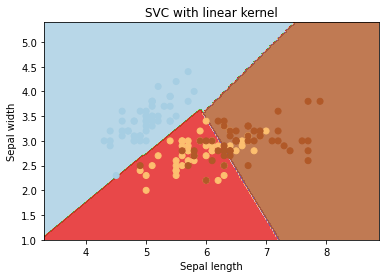

In [ ]:

# Import the Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
  
# Import some Data from the iris Data Set
iris = datasets.load_iris()
  
# Take only the first two features of Data.
# To avoid the slicing, Two-Dim Dataset can be used
  
X = iris.data[:, :2]
y = iris.target
  
# C is the SVM regularization parameter
C = 1.0 
  
# Create an Instance of SVM and Fit out the data.
# Data is not scaled so as to be able to plot the support vectors
svc = svm.SVC(kernel ='linear', C = 1).fit(X, y)
  
# create a mesh to plot
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
         np.arange(y_min, y_max, h))
  
# Plot the data for Proper Visual Representation
plt.subplot(1, 1, 1)
  
# Predict the result by giving Data to the model
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap = plt.cm.Paired, alpha = 0.8)
  
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
  
# Output the Plot
plt.show()